In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Задание №1

In [123]:
"""
Считываем датасет и оформляем его в DataFrame
"""
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = pd.Series(iris.target)
df_iris['name'] = df_iris.target.apply(lambda x : iris.target_names[x])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [124]:
X = df_iris.drop(['target', 'name'], axis=1)
Y = df_iris.target

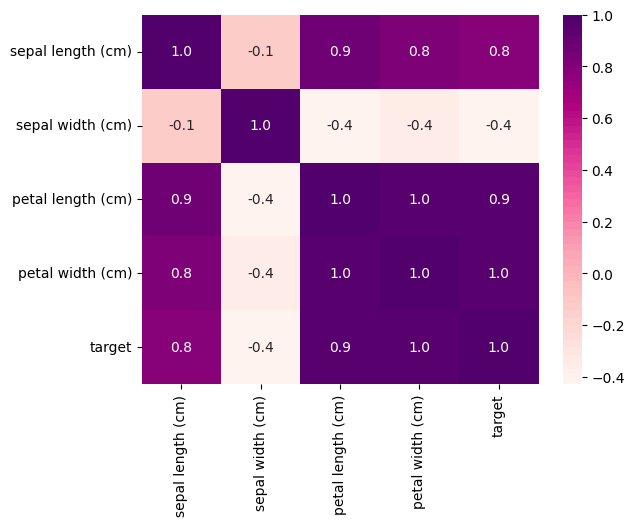

In [125]:
"""
Оценка линеной зависимости между признаками
"""
sns.heatmap(df_iris.drop('name', axis=1).corr(), annot = True, fmt=".1f", cmap= sns.color_palette("RdPu", 50))
plt.show()

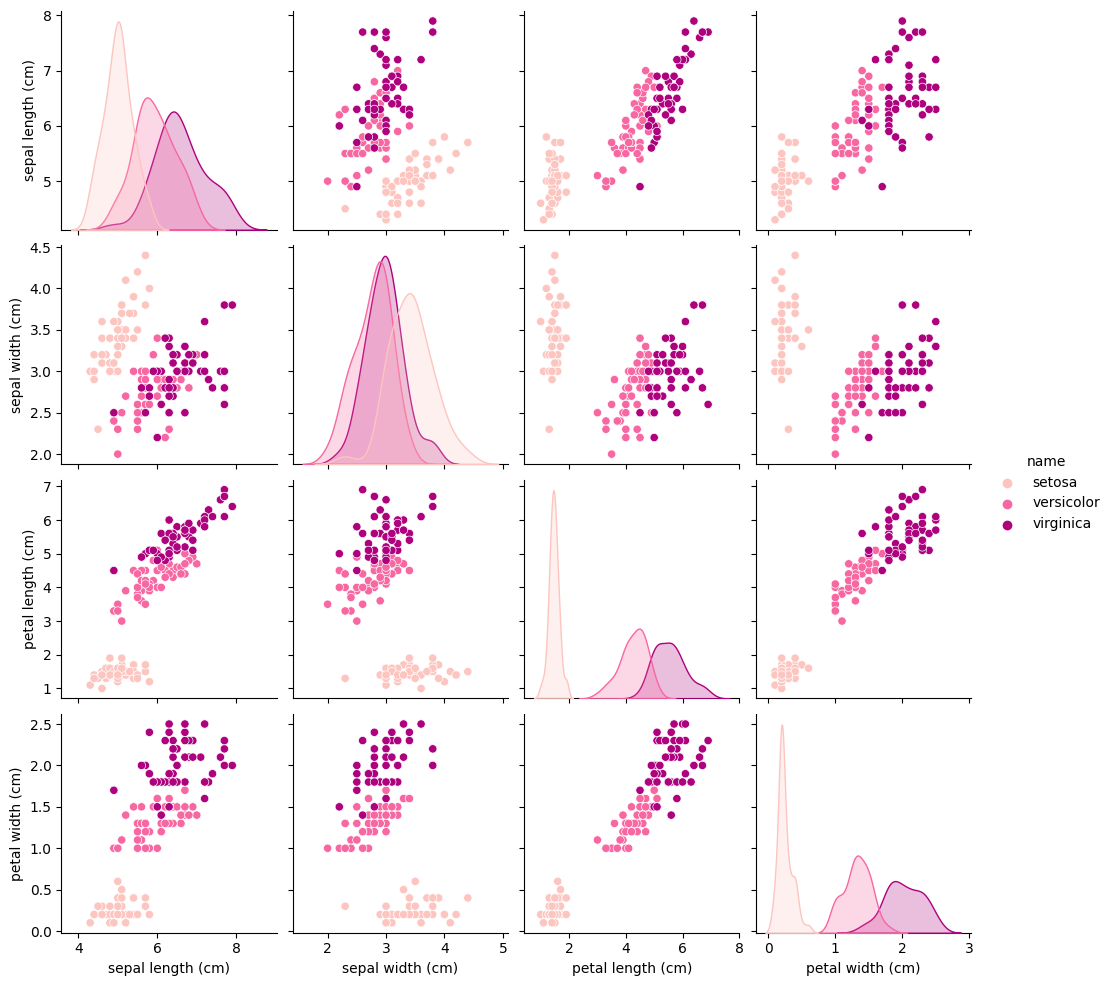

In [126]:
"""
Визуализируем данные в пространстве двух признаков
"""
sns.pairplot(df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']],palette= sns.color_palette("RdPu", 3),  hue = 'name')

In [127]:
"""
Разделяем датасет на тренировочную и тестовую выборку
"""
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
129,7.2,3.0,5.8,1.6
99,5.7,2.8,4.1,1.3
74,6.4,2.9,4.3,1.3
130,7.4,2.8,6.1,1.9
8,4.4,2.9,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
68,6.2,2.2,4.5,1.5
16,5.4,3.9,1.3,0.4
86,6.7,3.1,4.7,1.5


In [128]:
"""
Обучаем дерево решений
"""
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

[Text(0.375, 0.9, 'x[2] <= 2.7\ngini = 0.665\nsamples = 100\nvalue = [33, 36, 31]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.85\ngini = 0.497\nsamples = 67\nvalue = [0, 36, 31]'),
 Text(0.25, 0.5, 'x[0] <= 4.95\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.75, 0.5, 'x[3] <= 1.7\ngini = 0.117\nsamples = 32\nvalue = [0, 2, 30]'),
 Text(0.625, 0.3, 'x[2] <= 5.35\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

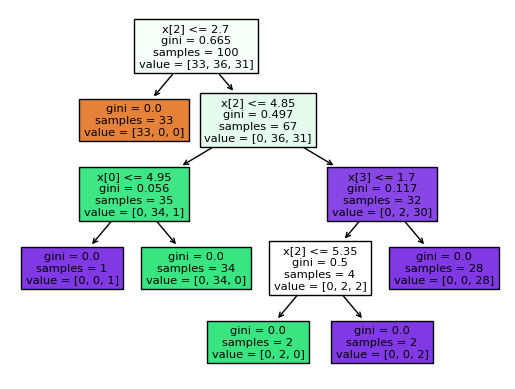

In [129]:
tree.plot_tree(clf, filled=True) 

### Точность 

In [130]:
print('Test Accuracy', metrics.accuracy_score(y_test, y_pred))

Test Accuracy 0.88


### Полнота

In [131]:
print('Test Precision', metrics.precision_score(y_test, y_pred, average='macro'))

Test Precision 0.8774509803921569


### Специфичность

In [132]:
print('Test Recall', metrics.recall_score(y_test, y_pred, average='macro'))

Test Recall 0.8822055137844611


# Задание №2

In [133]:
""" 
Обучаем градиентный бустинг
"""
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

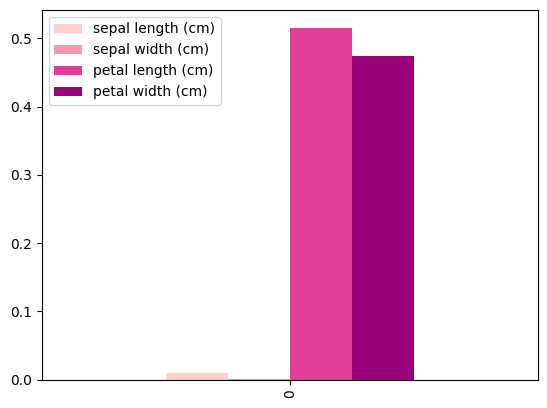

In [134]:
""" 
Визуализируем значимость переменных 
"""
importance = gb_model.feature_importances_
importance = importance.reshape(4,1)
d = dict(zip(X.columns, importance))
df_importance  = pd.DataFrame(d)
df_importance.plot.bar(color = sns.color_palette("RdPu", len(importance)))
plt.show()

In [135]:
import itertools
iterable = range(0, len(iris.feature_names))
pairs = list(itertools.combinations(iris.feature_names, 2))
pairs

[('sepal length (cm)', 'sepal width (cm)'),
 ('sepal length (cm)', 'petal length (cm)'),
 ('sepal length (cm)', 'petal width (cm)'),
 ('sepal width (cm)', 'petal length (cm)'),
 ('sepal width (cm)', 'petal width (cm)'),
 ('petal length (cm)', 'petal width (cm)')]

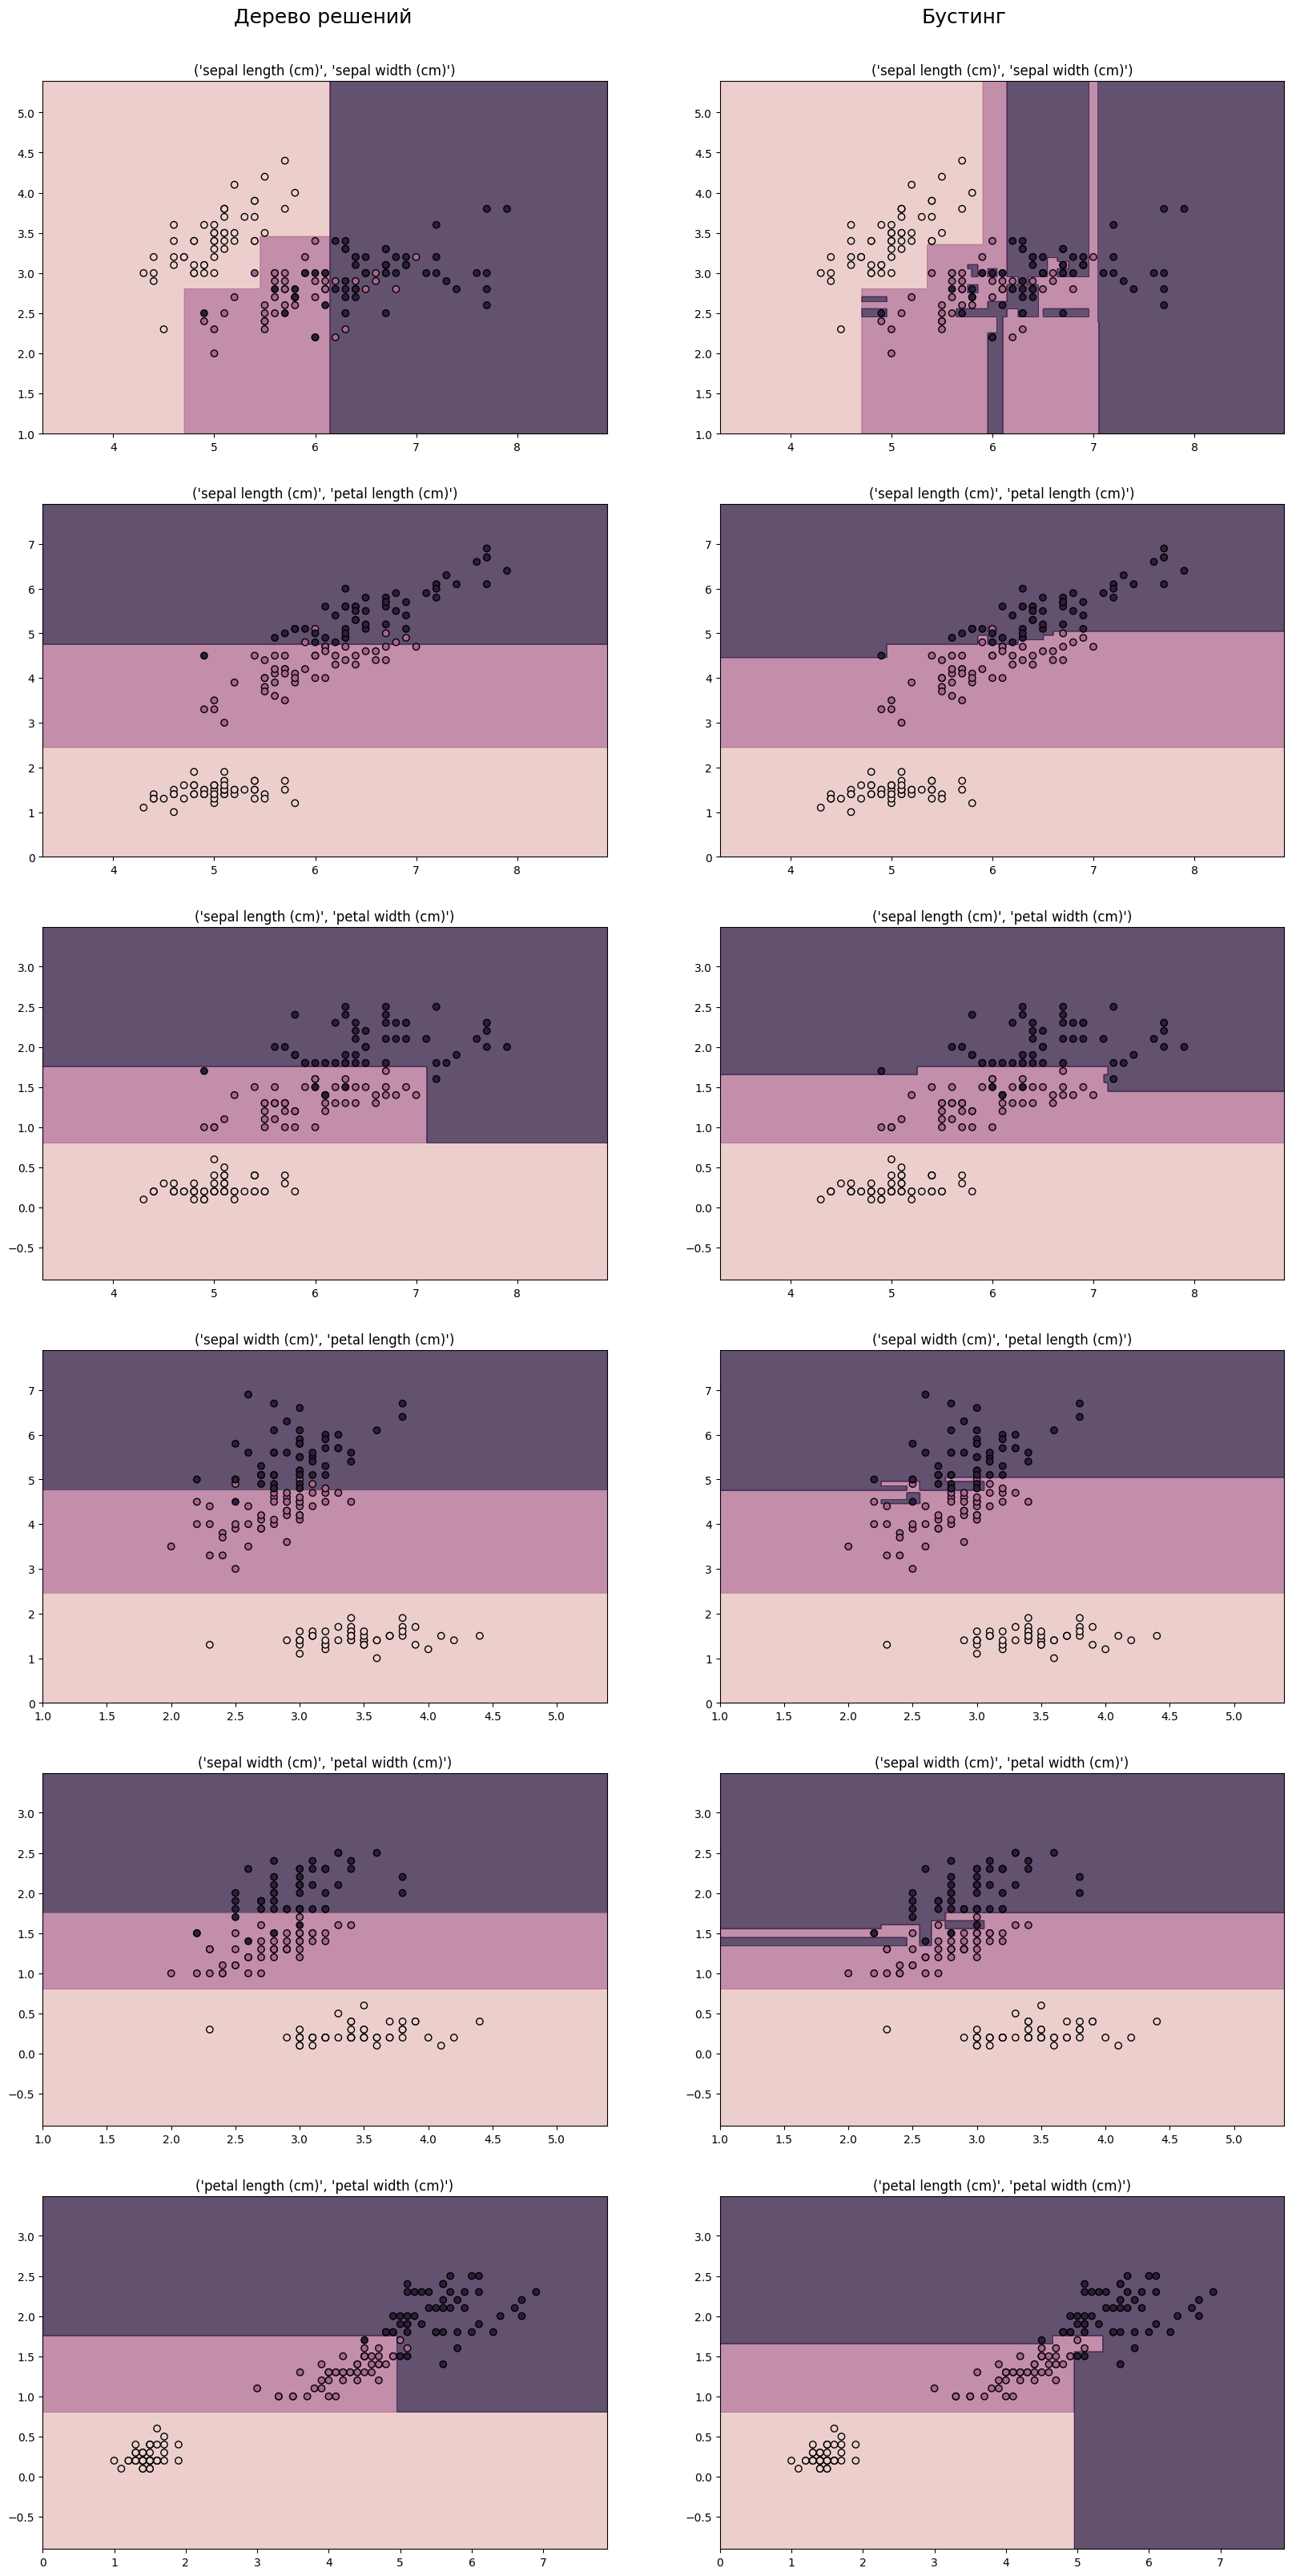

In [136]:
""" 
Визуализация работы бустинга
"""
fig, axs = plt.subplots(nrows= 6 , ncols= 2, figsize=(20, 40))
fig.text(s='Дерево решений', x=0.3, y=0.9, fontsize=18, ha='center', va='center')
fig.text(s='Бустинг', x=0.7, y=0.9, fontsize=18, ha='center', va='center')
for i, pair in enumerate(pairs):    
    X = df_iris[[pair[0], pair[1]]]
    y = df_iris['target']

    clf = tree.DecisionTreeClassifier(max_depth=3)
    clf = clf.fit(X, y)

    x_min, x_max = X[pair[0]].min() - 1, X[pair[0]].max() + 1
    y_min, y_max = X[pair[1]].min() - 1, X[pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i, 0].contourf(xx, yy, Z, alpha=0.8, cmap=sns.cubehelix_palette(as_cmap=True))
    axs[i, 0].scatter(X[pair[0]], X[pair[1]], c=y, edgecolors='k', cmap=sns.cubehelix_palette(as_cmap=True))
    axs[i, 0].set_title(pair)

    clf = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
    clf = clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i, 1].contourf(xx, yy, Z, alpha=0.8, cmap=sns.cubehelix_palette(as_cmap=True))
    axs[i, 1].scatter(X[pair[0]], X[pair[1]], c=y, edgecolors='k', cmap=sns.cubehelix_palette(as_cmap=True))
    axs[i, 1].set_title(pair)

plt.show()

# Задание №3

### Построить зависимость качества решения (на обучении и скользящем контроле) от числа вершин дерева.

In [137]:
leafs = np.arange(4, 21)
train_result = []
test_result = []
leafs

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [138]:
for l in leafs:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)
    gb_model = GradientBoostingClassifier(min_samples_leaf=l, n_estimators=10)
    gb_model.fit(x_train, y_train)
    train_result.append(gb_model.score(x_train, y_train))
    y_pred = gb_model.predict(x_test)
    test_result.append(metrics.accuracy_score(y_pred=y_pred, y_true=y_test))
    

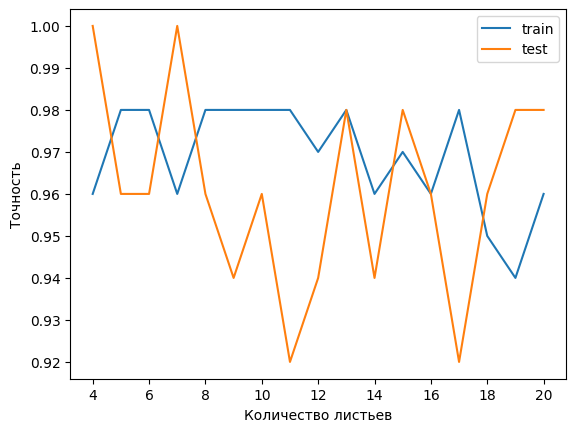

In [139]:
plt.plot(leafs, train_result)
plt.plot(leafs, test_result)
plt.xlabel('Количество листьев')
plt.ylabel('Точность')
plt.legend(['train','test'])
plt.show()

# Задание №4

### Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.


In [140]:
estimators = np.arange(1, 101)
train_result = []
test_result = []
estimators

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [141]:
for n in estimators:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)
    gb_model = GradientBoostingClassifier(n_estimators = n)
    gb_model.fit(x_train, y_train)
    train_result.append(gb_model.score(x_train, y_train))
    y_pred = gb_model.predict(x_test)
    test_result.append(metrics.accuracy_score(y_pred=y_pred, y_true=y_test))
    

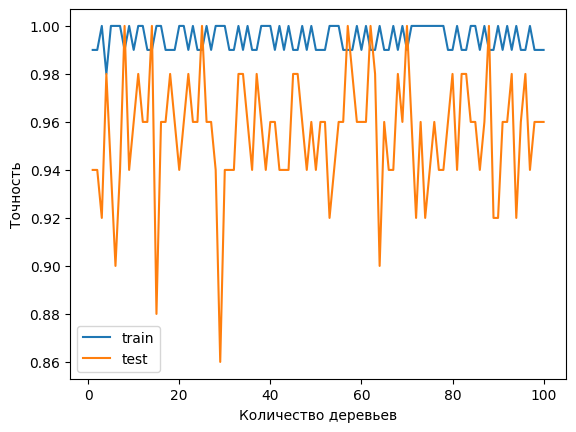

In [142]:
plt.plot(estimators, train_result)
plt.plot(estimators, test_result)
plt.xlabel('Количество деревьев')
plt.ylabel('Точность')
plt.legend(['train','test'])
plt.show()

### Для разной глубины дерева нужно построить несколько зависимостей качества от числа деревьев, чтобы найти оптимальную комбинацию этих параметров.


In [143]:
list_depth = np.arange(1, 11)
train_result = []
test_result = []
list_depth

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

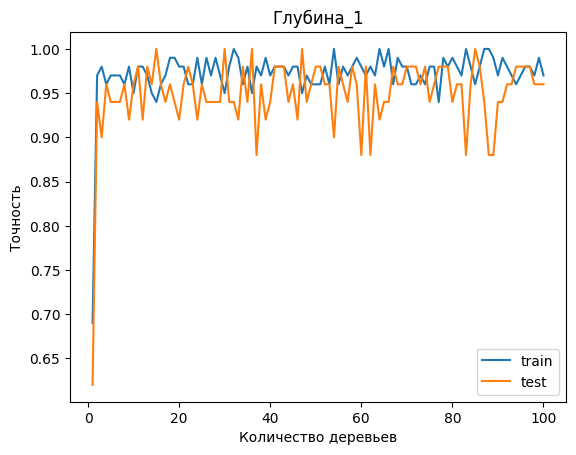

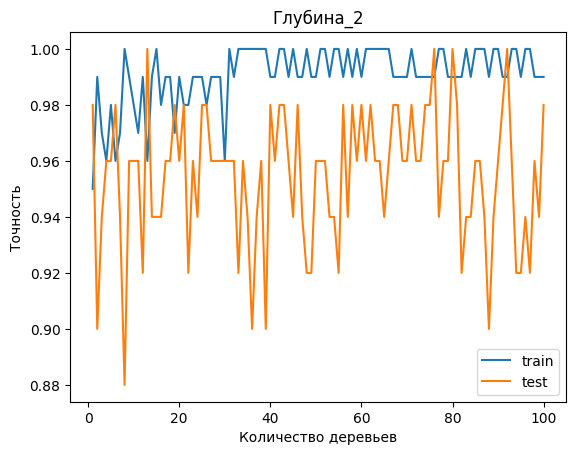

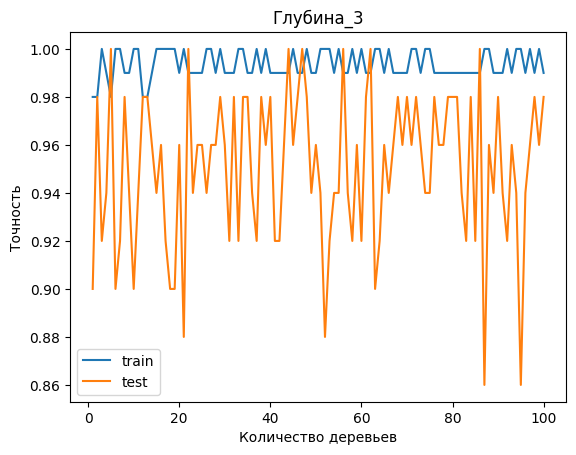

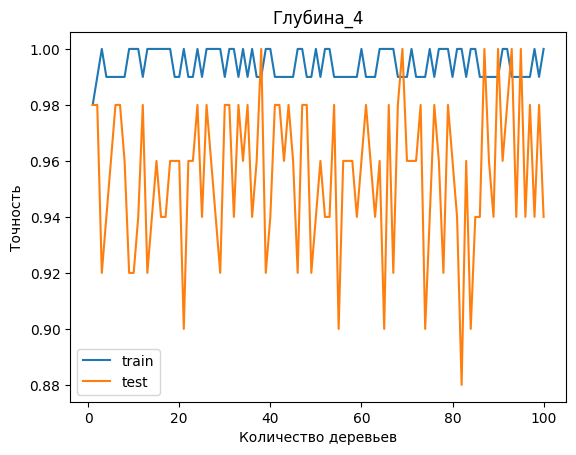

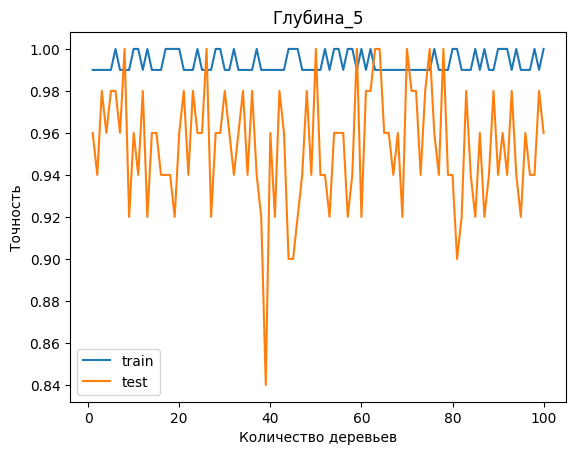

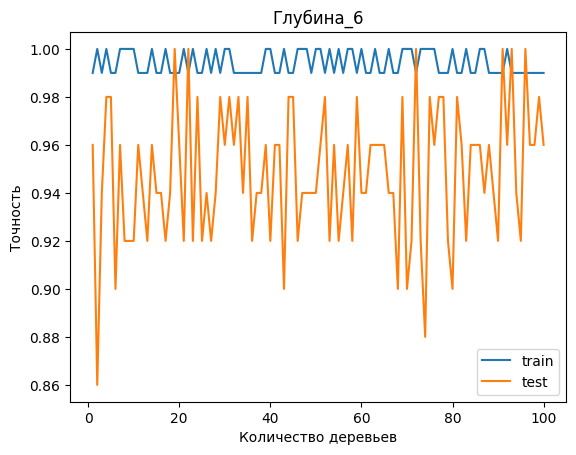

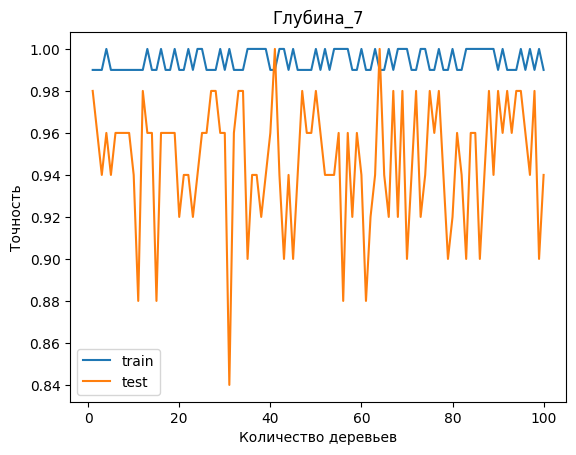

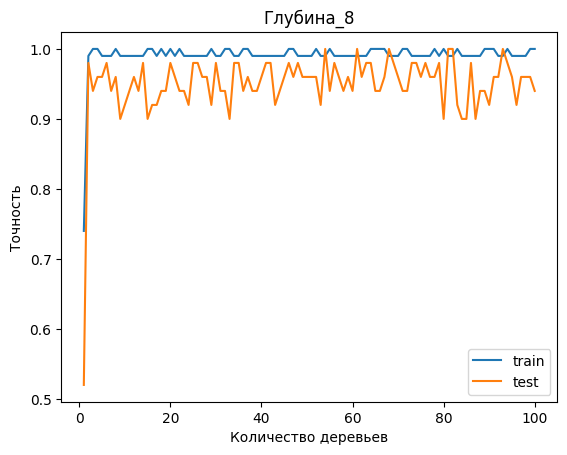

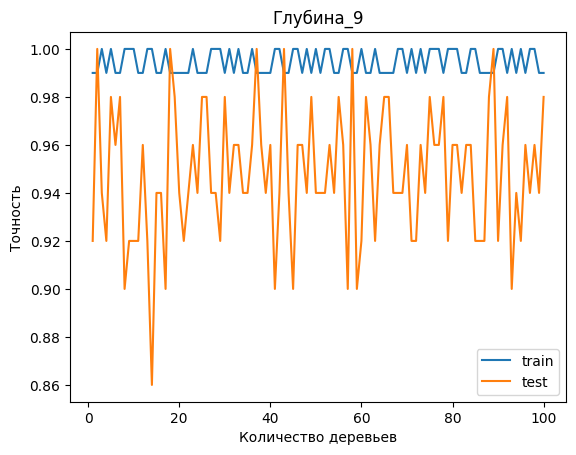

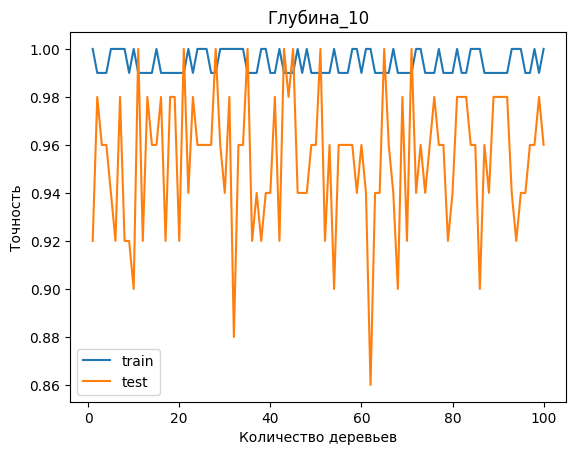

In [144]:
for d in list_depth:
    tr_result = []
    te_result = []
    for n in estimators:
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)
        gb_model = GradientBoostingClassifier(n_estimators = n, max_depth = d)
        gb_model.fit(x_train, y_train)
        tr_result.append(gb_model.score(x_train, y_train))
        y_pred = gb_model.predict(x_test)
        te_result.append(metrics.accuracy_score(y_pred=y_pred, y_true=y_test))
        
    plt.plot(estimators, tr_result)
    plt.plot(estimators, te_result)
    plt.title('Глубина_' + str(d))
    plt.xlabel('Количество деревьев')
    plt.ylabel('Точность')
    plt.legend(['train','test'])
    plt.show()
    

# Задание №5

### Выполнить предыдущий пункт для случайного леса.

In [145]:
list_depth = np.arange(1, 11)
train_result = []
test_result = []
list_depth

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

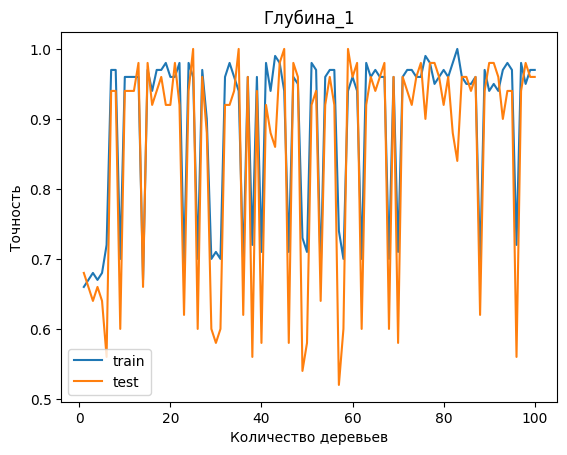

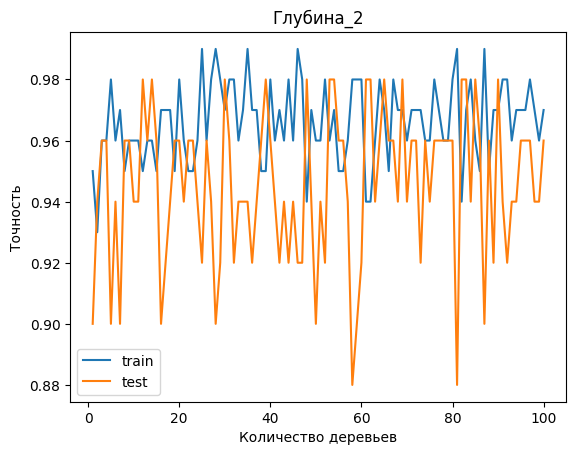

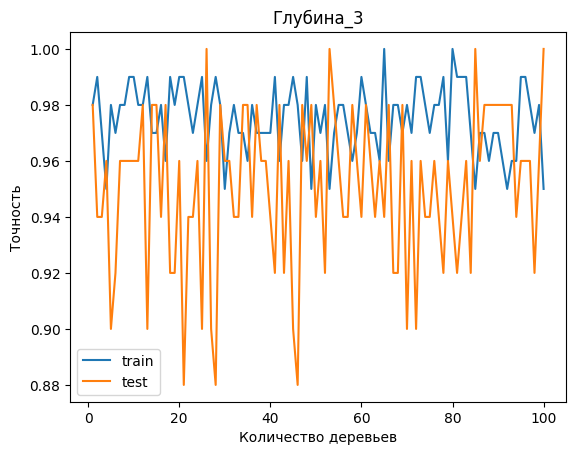

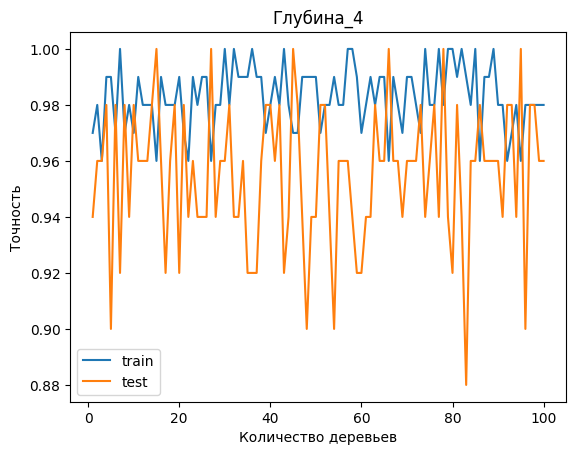

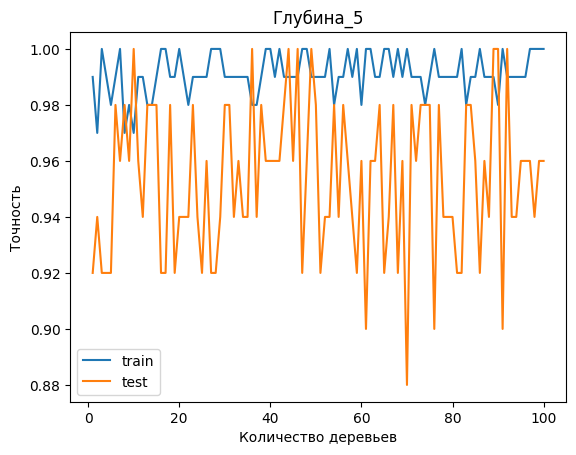

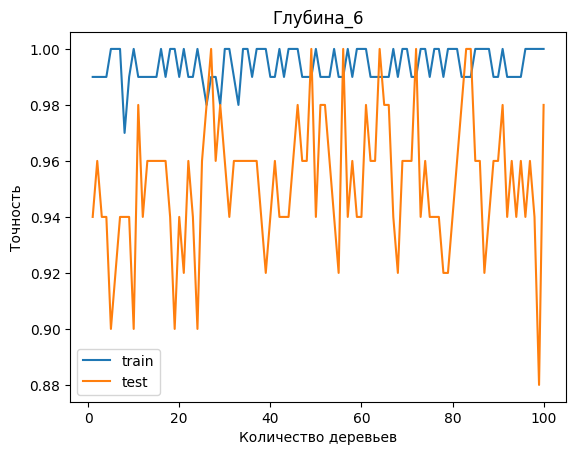

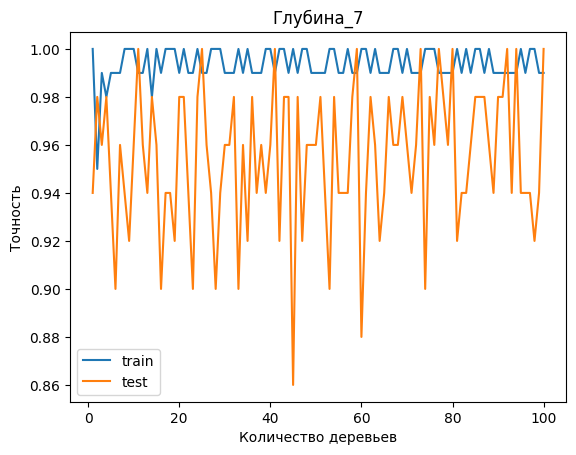

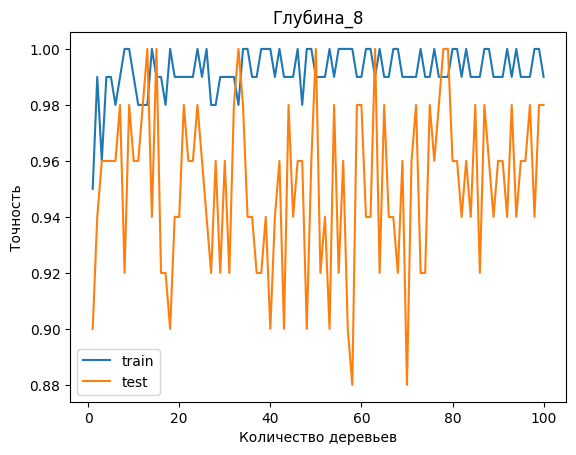

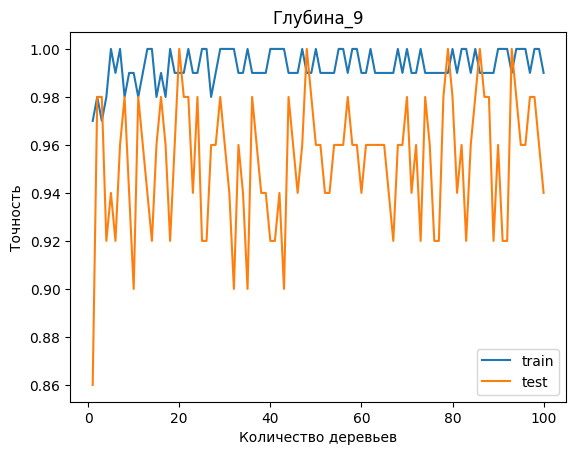

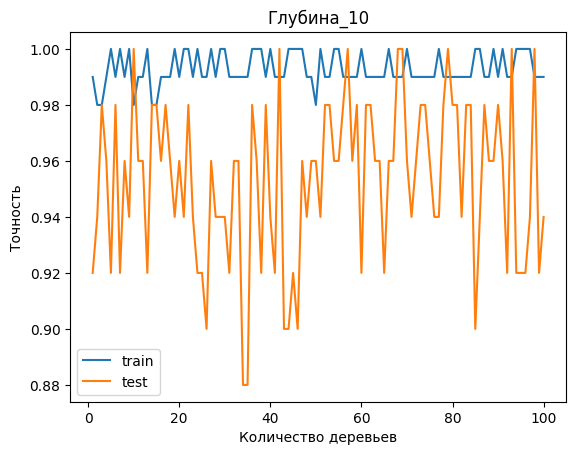

In [146]:
for d in list_depth:
    tr_result = []
    te_result = []
    for n in estimators:
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)
        rf_model = RandomForestClassifier(n_estimators = n, max_depth = d)
        rf_model.fit(x_train, y_train)
        tr_result.append(rf_model.score(x_train, y_train))
        y_pred = rf_model.predict(x_test)
        te_result.append(metrics.accuracy_score(y_pred=y_pred, y_true=y_test))

    plt.plot(estimators, tr_result)
    plt.plot(estimators, te_result)
    plt.title('Глубина_' + str(d))
    plt.xlabel('Количество деревьев')
    plt.ylabel('Точность')
    plt.legend(['train','test'])
    plt.show()
